# Ambientes/Environments

In [4]:
%matplotlib inline
import gym
import matplotlib.pyplot as plt
import time


env = gym.make('CartPole-v0')
# observation space: posición, velocidad, ángulo, velocidad de rotación

#env = gym.make('MountainCar-v0')
#

#env = gym.make('FrozenLake-v0')
# 
    
env.reset()

for _ in range(100):   
    env.render("rgb_array")
    result = env.step(env.action_space.sample())
    print(result)
    time.sleep(0.1)



(array([-0.0346981 , -0.16452213, -0.01873072,  0.28012321]), 1.0, False, {})
(array([-0.03798854,  0.03086194, -0.01312826, -0.01840799]), 1.0, False, {})
(array([-0.0373713 , -0.16406931, -0.01349642,  0.27010407]), 1.0, False, {})
(array([-0.04065269,  0.03124262, -0.00809434, -0.02680495]), 1.0, False, {})
(array([-0.04002784, -0.16376233, -0.00863043,  0.26331317]), 1.0, False, {})
(array([-0.04330308,  0.03148175, -0.00336417, -0.03207935]), 1.0, False, {})
(array([-0.04267345, -0.1635918 , -0.00400576,  0.25954025]), 1.0, False, {})
(array([-0.04594529, -0.35865634,  0.00118505,  0.55095702]), 1.0, False, {})
(array([-0.05311841, -0.55379491,  0.01220419,  0.84401308]), 1.0, False, {})
(array([-0.06419431, -0.35884161,  0.02908445,  0.55519285]), 1.0, False, {})
(array([-0.07137114, -0.5543596 ,  0.04018831,  0.85689542]), 1.0, False, {})
(array([-0.08245833, -0.35980759,  0.05732621,  0.57711522]), 1.0, False, {})
(array([-0.08965449, -0.55568421,  0.06886852,  0.88729218]), 1.

/home/javkrei/.local/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


(array([-0.19057672, -0.57590731,  0.26375305,  1.37475624]), 0.0, True, {})
(array([-0.20209487, -0.38486436,  0.29124817,  1.17474914]), 0.0, True, {})
(array([-0.20979216, -0.5823529 ,  0.31474316,  1.542928  ]), 0.0, True, {})
(array([-0.22143921, -0.39206791,  0.34560172,  1.36253611]), 0.0, True, {})
(array([-0.22928057, -0.58948961,  0.37285244,  1.74075516]), 0.0, True, {})
(array([-0.24107036, -0.39999588,  0.40766754,  1.58314052]), 0.0, True, {})
(array([-0.24907028, -0.21129481,  0.43933035,  1.43984746]), 0.0, True, {})
(array([-0.25329618, -0.40846711,  0.4681273 ,  1.83256775]), 0.0, True, {})
(array([-0.26146552, -0.22044275,  0.50477866,  1.71353161]), 0.0, True, {})
(array([-0.26587438, -0.41688823,  0.53904929,  2.1136317 ]), 0.0, True, {})
(array([-0.27421214, -0.61232269,  0.58132192,  2.51612981]), 0.0, True, {})
(array([-0.28645859, -0.42453413,  0.63164452,  2.44216088]), 0.0, True, {})


KeyboardInterrupt: 

Open AI Gym presenta una implementación clásica del ciclo agente-ambiente (agent-environment loop)

<img src="env-loop.PNG">


Para realizar una acción se invoca la función step (del environment) con parámetro la acción que se desea realizar. 

Esta función devuelve cuatro valores:

observation(objeto): es una observación, un objeto específico de cada environment. Por ejemplo imágenes de una cámara, ángulos y velocidades de las articulaciones de un robot, o el estado del tablero en un juego de tableros.

reward(float): es la recompensa recibida por cada acción. 

done(boolean): indica si terminó un episodio, la mayor parte de las tareas están divididas en episodios.

info(dict): información de diagnóstico útil para debuguear, a veces es tambipen útil para aprender comportamientos, pero los agentes no deberían utilizar esta información porque deben aprender de las observaciones y recompensas.

El proceso recomienza al usar la función reset()

# Espacios

En los ejemplos anteriores seleccionamos acciones al azar, pero cuáles y qué son esas acciones? Cada ambiente viene con dos atributos de clase <code>Space</code>, <code>action_space</code> y <code>observation_space</code>, que listan las acciones y observaciones válidas. Veamos un ejemplo:

In [5]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
print(env.observation_space)

Discrete(2)
Box(4,)


El espacio <code>Discrete</code> permite un rango fijo de números no negativos, en este caso las acciones válidas son 0 o 1. El espacio <code>Box</code> representa un cubo n-dimensional, y entonces las observaciones válidas son un array de 4 números. También podemos verificar los límites de el espacio de observaciones:

In [6]:
print(env.observation_space.high)
print(env.observation_space.low)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


También podemos chequear si una elemento pertenece a un espacio o cuál es el tamaño del espacio:

In [7]:
import numpy as np
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8

from gym import spaces
space = spaces.Box(low=np.array([0.0,0.0]), high=np.array([1.0,1.0]))
assert space.contains(np.array([0.5,0.5]))
assert space.contains(np.array([2.0,2.0]))


/home/javkrei/.local/lib/python3.5/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


AssertionError: 

# Ambientes disponibles:

Classic control and toy text: Son dos tareas de pequeña escala, de la literatura de clásica de Reinforcement Learning, son para comenzar.

Algorithmic: realización de operaciones on sumar numeros o revertir secuencias. La objeción es que estas tareas deberían ser fáciles para computadoras, pero la idea es que el algoritmo aprenda puramente de ejemplos. También es fácil variar la dificultad aumentando o disminuyendo la longitud de los números/secuencias.

2D and 3D robots: estos ambientes permiten controlar un robot en una simulación. Utilizan el motor de simulación de física MuJoCo, que fue diseñado para realizar simulaciones robóticas con velocidad y precisión. Es un software proprietario pero hay licencias gratis de prueba.

Atari: permiten jugar a juegos clásicos de Atari. Estos ejemplos tuvieron gran impacto en la investigación en Reinforcement Learning a pesar de ser 'sólo' juegos.

Para listar los ambientes disponibles en la instalación local se puede hacer lo siguiente:

In [8]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Atlantis-ramDeterministic-v4), EnvSpec(BattleZone-ramNoFrameskip-v4), EnvSpec(SpaceInvaders-ramNoFrameskip-v4), EnvSpec(FrostbiteDeterministic-v0), EnvSpec(ChopperCommand-v0), EnvSpec(UpNDownNoFrameskip-v4), EnvSpec(Assault-ram-v4), EnvSpec(Atlantis-ramNoFrameskip-v4), EnvSpec(Solaris-ram-v0), EnvSpec(RiverraidDeterministic-v0), EnvSpec(RobotankNoFrameskip-v4), EnvSpec(GopherDeterministic-v0), EnvSpec(DoubleDunk-ramNoFrameskip-v4), EnvSpec(RoadRunner-ramNoFrameskip-v0), EnvSpec(FreewayDeterministic-v0), EnvSpec(Bowling-v4), EnvSpec(Robotank-ram-v0), EnvSpec(AirRaid-v0), EnvSpec(ChopperCommandNoFrameskip-v0), EnvSpec(AsteroidsDeterministic-v0), EnvSpec(Reacher-v2), EnvSpec(BowlingDeterministic-v4), EnvSpec(UpNDown-ramDeterministic-v0), EnvSpec(Riverraid-v0), EnvSpec(Robotank-ramNoFrameskip-v4), EnvSpec(TimePilot-v0), EnvSpec(Tutankham-v0), EnvSpec(Tutankham-ramDeterministic-v4), EnvSpec(JamesbondDeterministic-v0), EnvSpec(MsPacman-ramDeterministic-v0), EnvSpec(Boxin

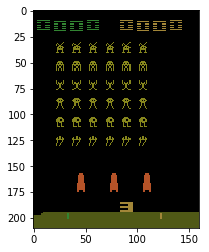

In [12]:
# ejemplo de Atari
# para instalar: pip3 install 'gym[atari]'
import gym
env = gym.make('SpaceInvaders-v0')
env.reset()
plt.imshow(env.render(mode='rgb_array'))


La razón por la que fue creado Open AI Gym fue para atacar dos problemas en la investigación en RL: 

* La necesidad de mejores benchmarks. Gran parte del avanze en aprendizaje supervisado se debió a la disponibilidad de grandes datasets rotulados, como Imagenet. En RL no había algo semejante, no había colecciones de ambientes de RL que tuvieran gran variedad y fueran fáciles de configurar y usar.

* Falta de estandarización de los ambientes usados en publicaciones. Sutiles diferencias en la definición de un problema, como la función recompensa o el conjunto de acciones, pueden cambiar la dificultad de un problema drásticamente. Este inconveniente hace más difícil reproducir los resultados y comparar diferentes papers.

### Jugar con OpenAI gym

Abajo hay código que maneja un auto hacia la derecha.

Pero no llega a alcanzar la bandera a la derecha por la gravedad.

__Tu objetivo__ es arreglarlo. Encontrá una política que alcance la bandera.

No hay que diseñar ningún algoritmo sofisticado, podés hardcodear todo.

_Pista: la acción a cada paso debe depender de t o s ._

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


<IPython.core.display.Javascript object>


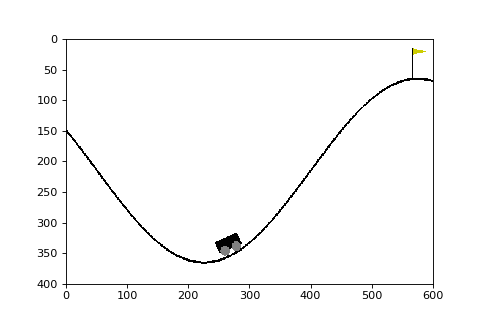

Límite de tiempo cumplido. Intentá de nuevo!


In [3]:

# Crear el ambiente manualmente para imponer límite de tiempo
TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(gym.envs.classic_control.MountainCarEnv(),
                             max_episode_steps=TIME_LIMIT + 1)
s = env.reset()
actions = {'left': 0, 'stop': 1, 'right': 2}

# preparar el display
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

def policy(s, t):
    # Tu código iría acá
    return actions['right']


for t in range(TIME_LIMIT):
    
    s, r, done, _ = env.step(policy(s, t))
    
    #dibujar imagen
    ax.clear()
    ax.imshow(env.render('rgb_array'))
    fig.canvas.draw()
    
    if done:
        print("Éxito!")
        break
else:    
    print("Límite de tiempo cumplido. Intentá de nuevo!")